## Complementary notes for 'Simulation, statistics and probability'

### Revisiting confidence intervals

Even in scientific litterature there are two very common mistakes regarding confidence intervals:

- Interpretation:
   - Correct: A 99% confidence interval on the mean will have the true mean inside the interval in 99 of 100 samples.
   - Wrong: A 99% confidence interval on the mean has a 99% probability to contain the true mean in the sample.

- Support:
   - Correct: A 99% confidence interval is only valid if the normal assumption is valid to within $\alpha=0.01$.
   - Wrong: A 99% confidence interval is simply wider than a 90% confidence interval, the choice is arbitrary.

In fact, these two mistakes are directly related. Confidence intervals as we have defined them are _frequentist_, while the incorrect usages assumes they are _classical_. As you know from the statistics course, that can lead to some very strange conclusions (such as the probability of rolling a '3' on a six-sided die being 0.5).

A further source of confusion is the fact the one of the most used types of confidence interval is the _bootstrapped confidence interval_. Those _simulate_ a distribution by sampling from the data and _estimate_ the confidence interval. 

Since these are estimates, they have an error. In other words, they are approximations of an estimate and not strictly mathematically sound. Significantly for regressions, the errors in the confidence interval and the regression residuals are _correlated_. As we have defined confidence intervals, these bootstrapped CIs _themselves_ have a confidence interval. Typically these are restricted to a 'first-order' approximation and a 'second-order' approximation. 

They are very useful for _comparisons_ between regressions, to decide which model is more accurate, but don't fulfill the definition of CIs. With bootstrapped CIs, it's only correct in some percentage of cases (that depends on the sample size) that the true mean is inside the interval in 99 of 100 samples for a 99% CI. So it _isn't_ actually a 99% CI, but some approximation of it. If sample sizes are different throughout execution, you pretty much loose track entirely of what the total error could be.

Machine learning makes extensive use of numerical simulation in place of statistics or probabilistic inference (Bayesian). Indeed, machine learning as a whole can be seen as a discipline of _universal approximation_ through _simulation_ (what we call training). 

There's a whole class of simulation methods called _Monte Carlo_ methods, that work by random sampling. A classic example is the computation of $\pi$ through random sampling:

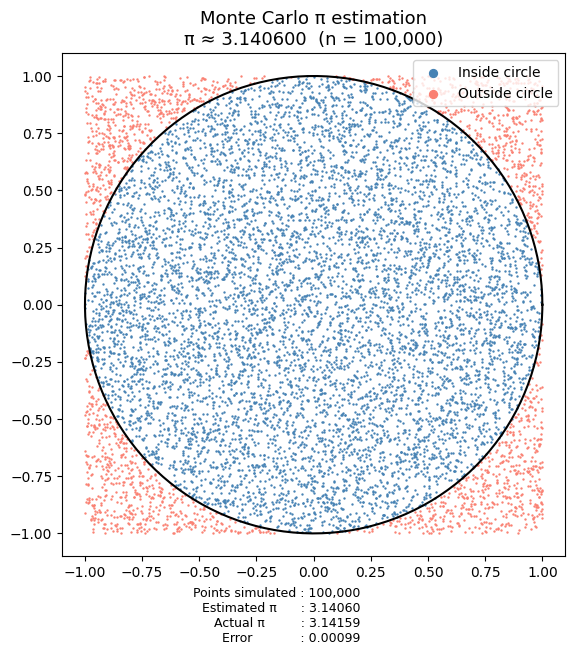

In [2]:
# Code generates figure 1
# [claude.ai]>>> Provide a python script suitable for a jupyter notebook cell that gives the classic example of 
#                approximating pi using a monte carlo method.
# (modified)
import numpy as np
import matplotlib.pyplot as plt

n_points = 100_000

x = np.random.uniform(-1, 1, n_points)
y = np.random.uniform(-1, 1, n_points)

distances = x**2 + y**2
inside = distances <= 1.0

pi_estimate = 4 * np.sum(inside) / n_points
txt =  f"Points simulated : {n_points:,}\n"\
       f"Estimated π      : {pi_estimate:.5f}\n"\
       f"Actual π         : {np.pi:.5f}\n"\
       f"Error            : {abs(pi_estimate - np.pi):.5f}\n"

fig, ax = plt.subplots(figsize=(6, 6))

sample = min(n_points, 10_000)
ax.scatter(x[:sample][inside[:sample]],  y[:sample][inside[:sample]],
           s=0.5, color="steelblue", label="Inside circle")
ax.scatter(x[:sample][~inside[:sample]], y[:sample][~inside[:sample]],
           s=0.5, color="salmon",    label="Outside circle")

theta = np.linspace(0, 2 * np.pi, 300)
ax.plot(np.cos(theta), np.sin(theta), "k-", linewidth=1.5)
ax.set_aspect("equal")
ax.set_title(f"Monte Carlo π estimation\nπ ≈ {pi_estimate:.6f}  (n = {n_points:,})", fontsize=13)
ax.legend(markerscale=8, loc="upper right")
plt.figtext(0.62, -0.1, txt, wrap=True, horizontalalignment='right', fontsize=9)
plt.tight_layout()
plt.show()

What bootstrapped confidence intervals do is conceptually similar-- randomly sample the data many times and compute the frequency of different means. What would correspond to 'outside' and 'inside' the circle is defined by the $\alpha$ value.

While the error is 'small' in some sense, this estimate does not _behave_ like $\pi$ -- a transcendental number in the reals. If you try to do frequency analysis, for example, with this approximation, your results will be wrong by orders of magnitude. In machine learning, we don't know the error (since we don't know the true value of whatever stands-in for $\pi$), so we also don't know how exact we need to be. Hence, we _scale_ practically everything. There are exeptions, in particular for information entropy based methods such as _decision trees_. 